In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

%load_ext autoreload
%autoreload 2

### Manual
---

Please load the dataframe from S3 as shown below using pandas. The loaded df contains data, predictions and scores produced by both the old customer model (currently in production) and the new model (refitted) using data from 20190101 to 20201130.

Important columns:
* pred_20200101: predictions of the old model
* score_20200101: score of the old model
* pred_20201130: predictions of the new model
* score_rescaled: rescaled score of the new model

Note:
* there is a column with name `score_20201130`. The column contains scores produced by the refitted model but with the old score scaling parameters. I aligned the new model score with respect to the old score distribution as much as possible using the same scoring mechanism by changing parameters. Please let me know if there is any suggestions or comments.

In [3]:
s3_path = "s3://sofi-data-science/jxu/monitoring/customer-risk-v1/2021-03/validation_df_dec.parquet"
df = pd.read_parquet(s3_path)

In [4]:
df.shape

(568715, 99)

In [6]:
# prediction columns
df.columns[df.columns.str.contains("pred")]

Index(['pred_20200101', 'pred_20201130'], dtype='object')

In [9]:
# score columns
df.columns[df.columns.str.startswith("score_")]

Index(['score_20200101', 'score_20201130', 'score_rescaled'], dtype='object')

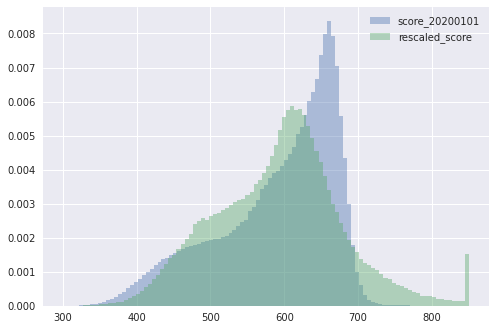

In [5]:
bins = 100
density = True
df.score_20200101.hist(bins=bins, alpha=0.4, density=density, label="score_20200101") # immediately after training
df.score_rescaled.hist(bins=bins, alpha=0.4, density=density, label="rescaled_score")
plt.legend()

In [25]:
cols = ['business_account_number', 'user_id', 'borrower_id', 'sample_date', 
        'pred_20200101', 'pred_20201130',
        'score_20200101', 'score_20201130', 'score_rescaled']

In [26]:
df[cols].head()

,business_account_number,user_id,borrower_id,sample_date,pred_20200101,pred_20201130,score_20200101,score_20201130,score_rescaled
5038328,410002729647,299,103.0,2020-12-01,0.000493,0.012754,397.307481,497.940787,485.269051
5038329,410000276182,305,107.0,2020-12-01,0.133862,0.010992,574.411334,493.303528,476.344136
5038330,410000345005,361,135.0,2020-12-01,0.003632,0.041214,458.952770,534.981621,556.558202
5038331,410004685311,558,4150909.0,2020-12-01,0.291634,0.019811,604.600579,511.730527,511.808920
5038332,410000136769,1303,343.0,2020-12-01,0.000711,0.014762,408.595816,502.506478,494.056224
